# 2 - Logistic Regression

In [28]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Generate a random dummy dataset

In [70]:
X, Y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=100)

Text(0, 0.5, '$x_1$')

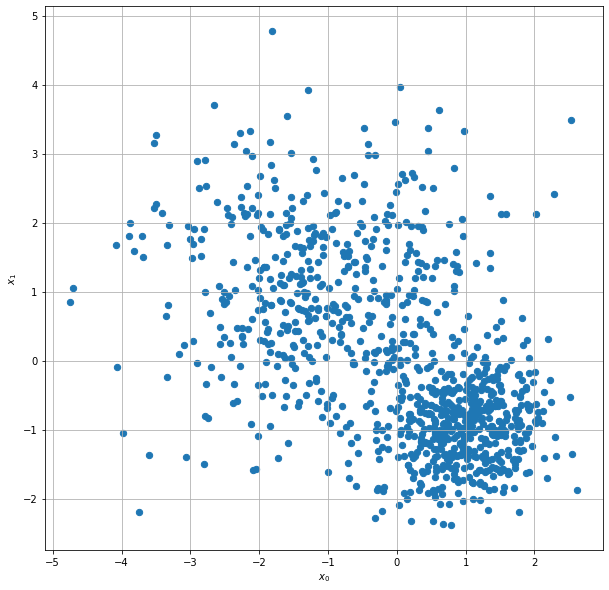

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(X[:, 0], X[:, 1], s=40)
ax.grid()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

Text(0, 0.5, '$x_1$')

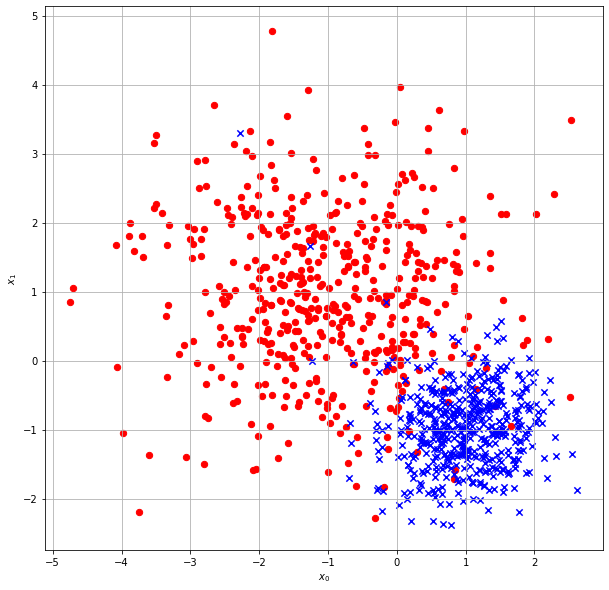

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(X[Y == 0, 0], X[Y == 0, 1], c='red', marker='o', s=40)
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], c='blue', marker='x', s=40)
ax.grid()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

## Split the dataset into train (70%) and test (30%) sets

In [59]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=100)

## Fit a Logistic Regression model

In [60]:
lr = LogisticRegression(penalty='none', random_state=100)

In [61]:
lr.fit(X_train, Y_train)

LogisticRegression(penalty='none', random_state=100)

## Let's compute the accuracy of our classifier on the test set

In [62]:
lr.score(X_test, Y_test)

0.97

## The equation of the separating line is:
### c0x0 + c1x1 + q = 0

## We transform it into:
### -c1x1 = c0x0 + q where c0, c1 are lr.coef_[0,0] and lr.coef_[0, 1] and q is lr.intercept_
### x1 = (c0x0 + q) / (-c1)

In [63]:
x0_0 = -5.0
x0_1 = 4.0

x1_0 = (lr.coef_[0, 0] * x0_0 + lr.intercept_) / -lr.coef_[0, 1]
x1_1 = (lr.coef_[0, 0] * x0_1 + lr.intercept_) / -lr.coef_[0, 1]

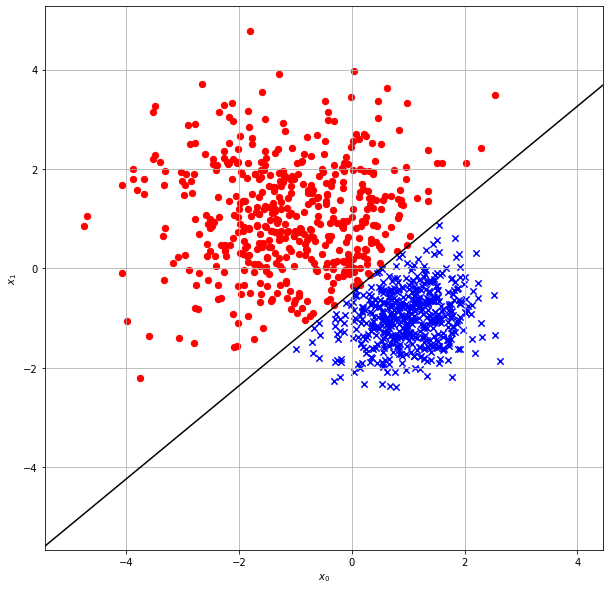

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))

Yp = lr.predict(X)

ax.scatter(X[Yp == 0, 0], X[Yp == 0, 1], c='red', marker='o', s=40)
ax.scatter(X[Yp == 1, 0], X[Yp == 1, 1], c='blue', marker='x', s=40)
ax.grid()
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

ax.axline((x0_0, x1_0[0]), (x0_1, x1_1[0]), c='black')

## Let's compute some probabilities
### p((0,0)) and p((-2, 2))

In [65]:
x00 = [[0, 0]]

p = lr.predict_proba(x00)

print("Class: %u - p = %.2f%%" % (np.argmax(p), np.max(p) * 100))

Class: 0 - p = 74.64%


In [67]:
x22 = [[2, -2]]

p = lr.predict_proba(x22)

print("Class: %u - p = %.4f%%" % (np.argmax(p), np.max(p) * 100))

Class: 1 - p = 99.9470%
